In [3]:
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
data.shape

(1000, 40)

In [7]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [11]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [12]:
#not quality column
drop_column=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']
data.drop(drop_column,inplace=True,axis=1)


In [13]:
data.drop(columns=['_c39'],axis=True,inplace=True)

In [14]:
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [15]:
data.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [17]:
# separating the feature and target columns

x = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']

In [18]:
# extracting categorical columns
cat_data = x.select_dtypes(include = ['object'])
cat_data

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,?,Minor Damage,Police,?,?
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,?,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,?,Minor Damage,None,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
995,500/1000,FEMALE,Masters,craft-repair,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,YES,?
996,100/300,FEMALE,PhD,prof-specialty,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,YES,?
997,250/500,FEMALE,Masters,armed-forces,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,?,YES
998,500/1000,MALE,Associate,handlers-cleaners,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,?,YES


In [19]:
# printing unique values of each column
for col in cat_data.columns:
    print(f"{col}: \n{cat_data[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' '?' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' '?' 'NO']

police_report_available: 
['YES' '?' 'NO']



In [20]:
cat_data = pd.get_dummies(cat_data, drop_first = True)
cat_data

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
996,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
997,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
998,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [21]:
# extracting the numerical columns

num_data = x.select_dtypes(include = ['int64'])
num_data

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,0,0,0,20,1,0,1,87200,17440,8720,61040
996,285,41,1000,0,70900,0,23,1,2,3,108480,18080,18080,72320
997,130,34,500,3000000,35100,0,4,3,2,3,67500,7500,7500,52500
998,458,62,2000,5000000,0,0,2,1,0,1,46980,5220,5220,36540


In [22]:
# combining the Numerical and Categorical dataframes to get the final dataset

x= pd.concat([num_data, cat_data], axis = 1)
x

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,48,1000,0,53300,0,5,1,1,2,...,0,0,0,0,0,1,0,1,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,0,0,1,1,0,1,0
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,0,0,0,0,1,0,0,1,0
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,0,0,0,20,1,0,1,...,0,0,1,0,0,0,0,1,0,0
996,285,41,1000,0,70900,0,23,1,2,3,...,0,0,1,0,0,0,0,1,0,0
997,130,34,500,3000000,35100,0,4,3,2,3,...,0,0,0,0,0,1,0,0,0,1
998,458,62,2000,5000000,0,0,2,1,0,1,...,0,0,0,0,1,0,0,0,0,1


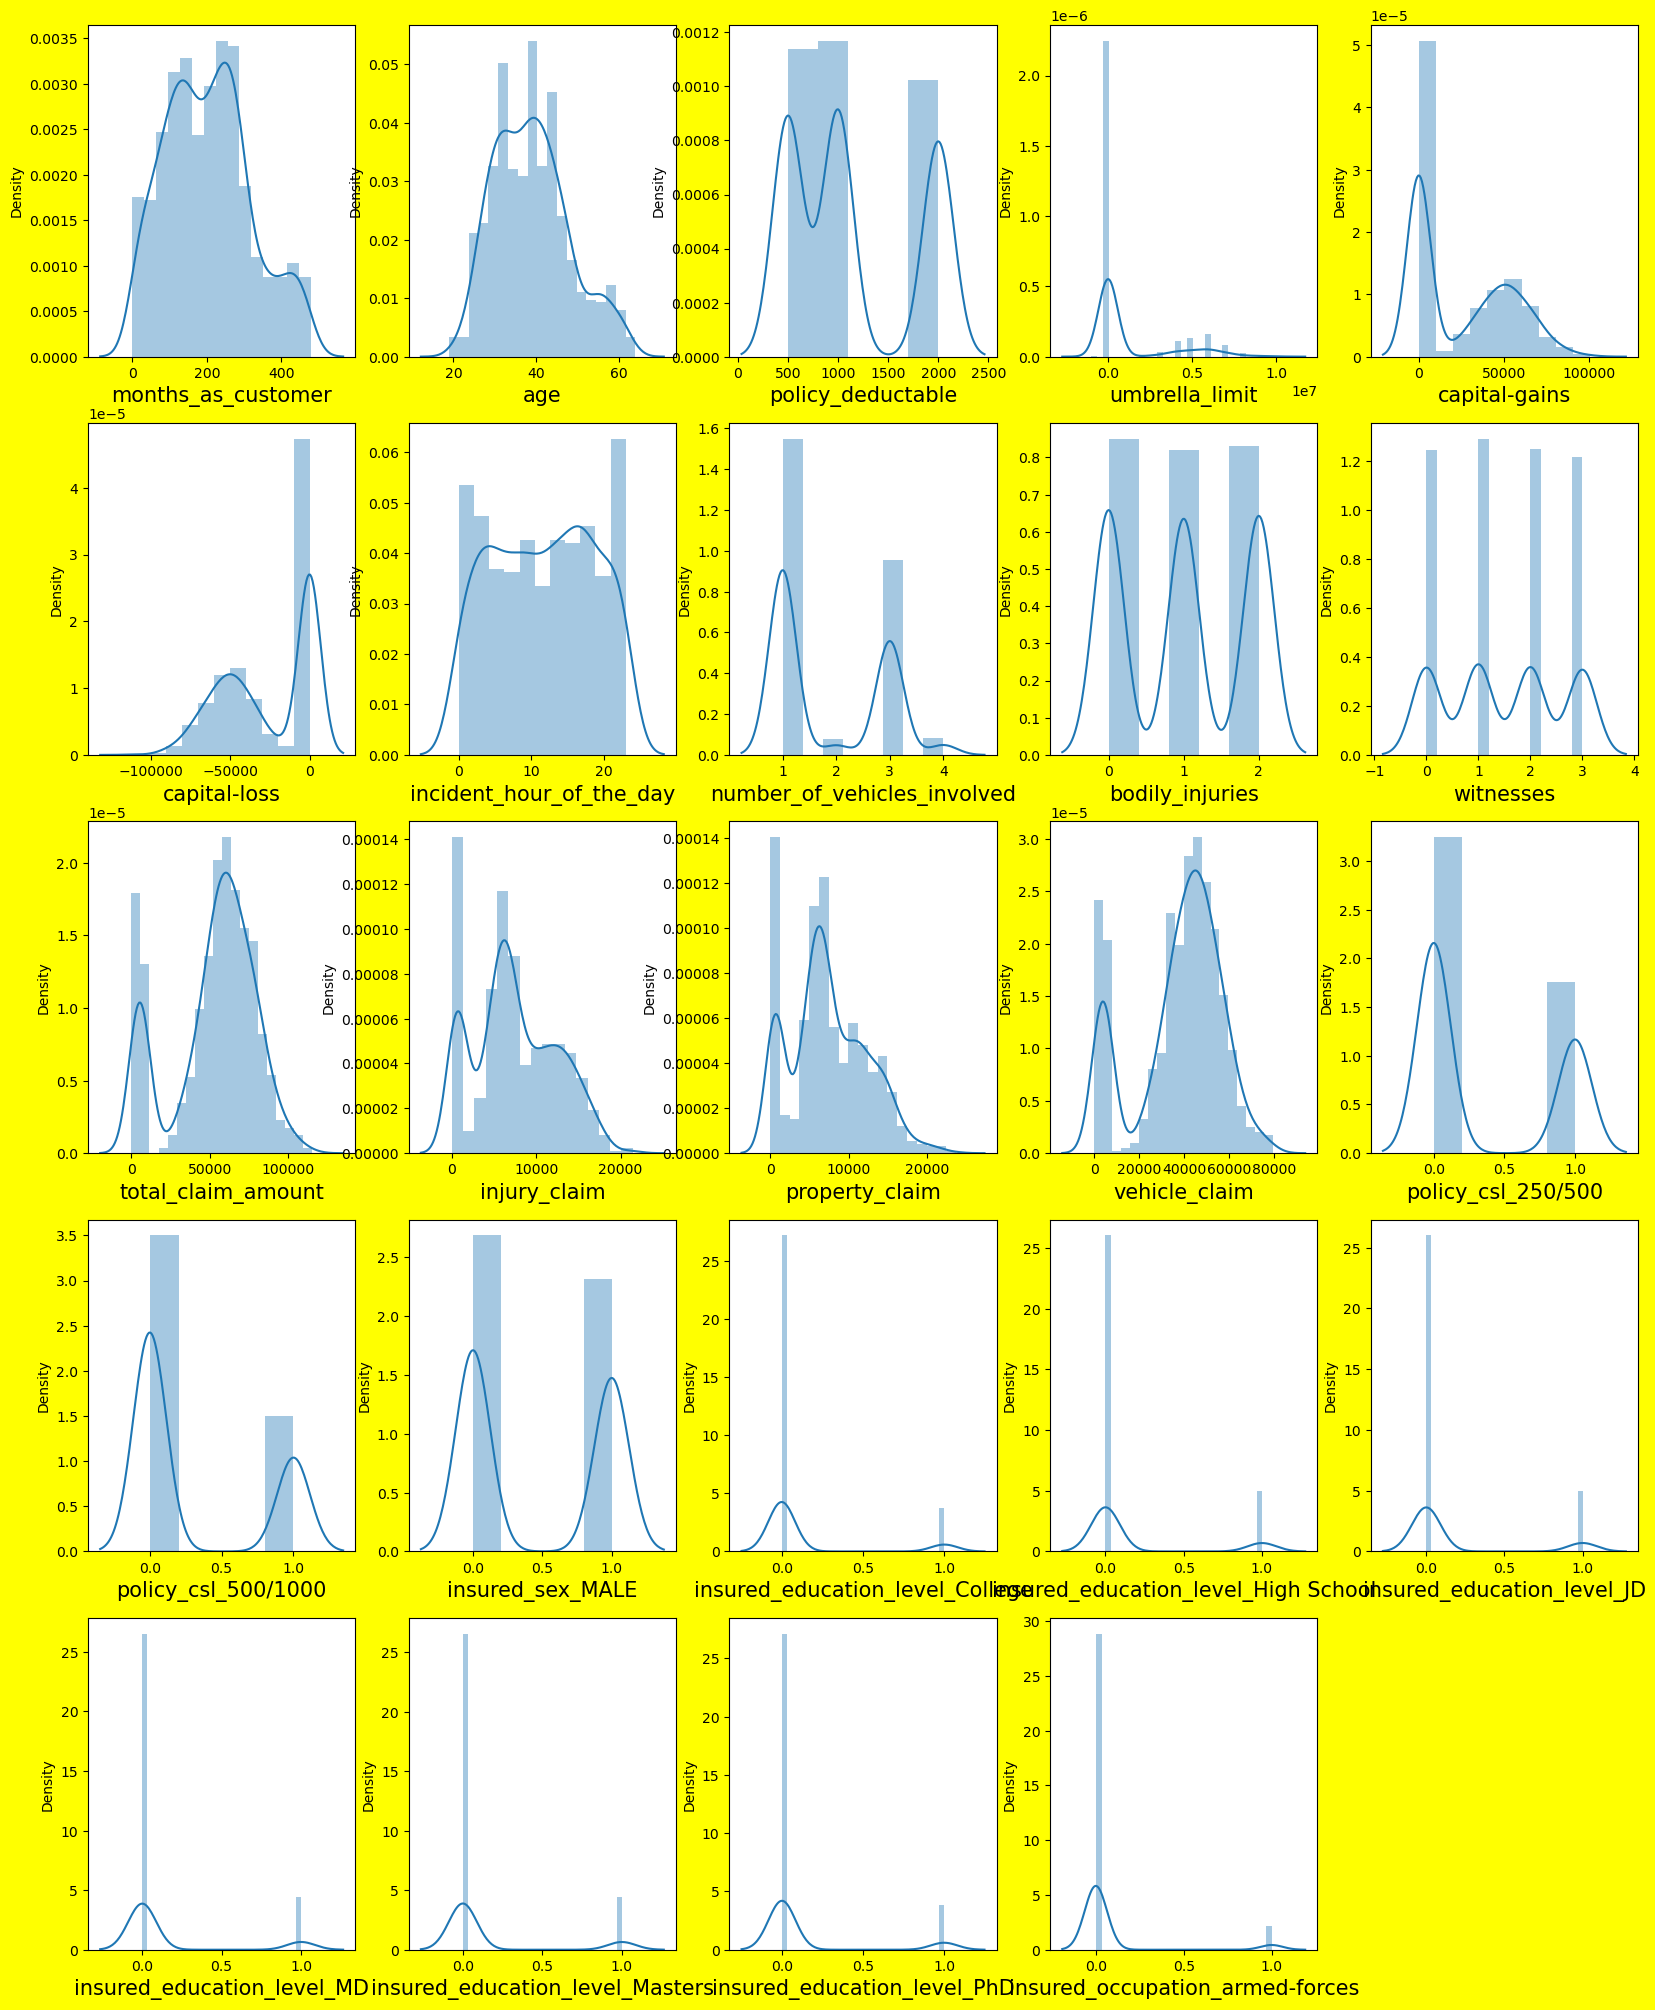

In [23]:
plt.figure(figsize=(20,25),facecolor='yellow')
graph=1

for col in x.columns:
    if graph<=24:
        plt.subplot(5,5,graph)
        ax=sns.distplot(x[col])
        plt.xlabel(col,fontsize=15)
        
    graph+=1
plt.show()    

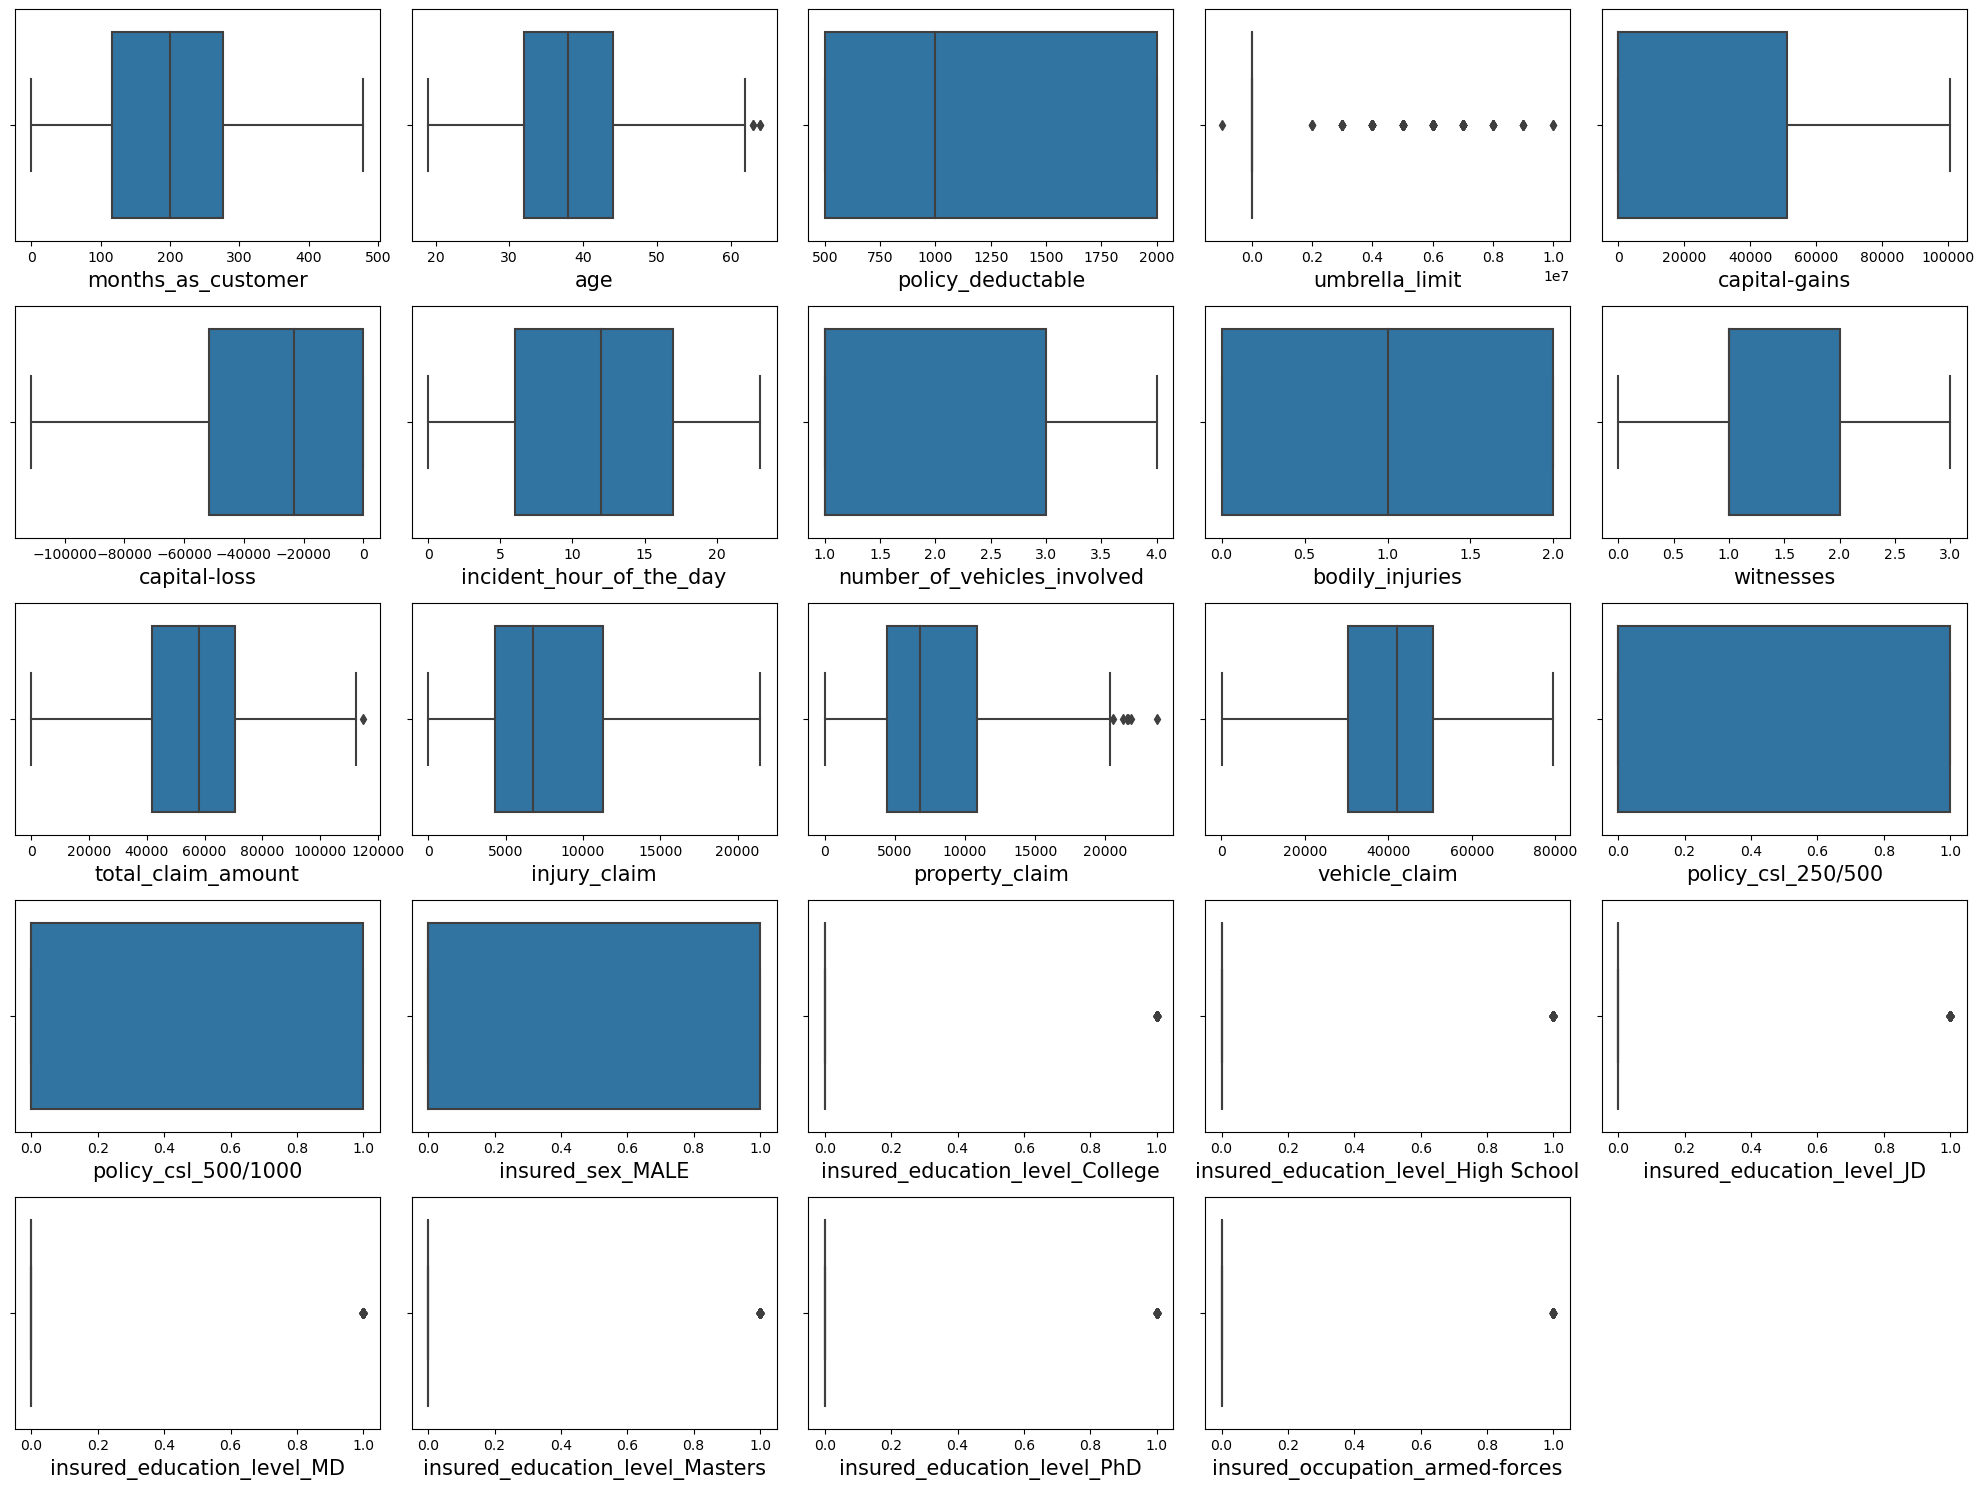

In [24]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in x.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [27]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


In [28]:
num_data = x_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [29]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)

In [30]:
scaled_num_data = pd.DataFrame(data = scaled_data, columns = num_data.columns, index = x_train.index)
scaled_num_data.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
655,-0.068379,-0.215016,-0.490318,-0.912157,-1.042268,0.915188,-0.841774,0.006468,-0.439350,0.412209,0.429200,2.045454
428,-0.341685,-0.215016,-0.490318,-0.912157,-0.437208,1.493323,1.106777,-1.206236,-1.334764,0.251148,0.265409,0.771827
355,0.442967,-1.033606,-0.490318,1.141903,-1.422695,-0.096549,-0.841774,-1.206236,-1.334764,0.819957,-0.348291,0.435985
225,0.345988,1.422163,-0.490318,-0.028223,-1.237916,-1.108285,-0.841774,-1.206236,-0.439350,-0.026120,1.507321,0.728372
73,0.081498,-1.033606,-0.490318,-0.912157,-0.600248,-0.674684,1.106777,1.219171,-1.334764,0.416286,-0.553549,0.266454


In [31]:
x_train.drop(columns = scaled_num_data.columns, inplace = True)


In [32]:
x_train = pd.concat([scaled_num_data, x_train], axis = 1)


In [34]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

In [35]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(x_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.7586666666666667
Test accuracy of Support Vector Classifier is : 0.736
[[184   0]
 [ 66   0]]
              precision    recall  f1-score   support

           N       0.74      1.00      0.85       184
           Y       0.00      0.00      0.00        66

    accuracy                           0.74       250
   macro avg       0.37      0.50      0.42       250
weighted avg       0.54      0.74      0.62       250



In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(x_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7586666666666667
Test accuracy of KNN is : 0.736
[[184   0]
 [ 66   0]]
              precision    recall  f1-score   support

           N       0.74      1.00      0.85       184
           Y       0.00      0.00      0.00        66

    accuracy                           0.74       250
   macro avg       0.37      0.50      0.42       250
weighted avg       0.54      0.74      0.62       250



In [37]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.392
[[ 68 116]
 [ 36  30]]
              precision    recall  f1-score   support

           N       0.65      0.37      0.47       184
           Y       0.21      0.45      0.28        66

    accuracy                           0.39       250
   macro avg       0.43      0.41      0.38       250
weighted avg       0.54      0.39      0.42       250



In [38]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [39]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}
0.8186666666666668


In [40]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(x_test)

In [41]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8186666666666667
Test accuracy of Decision Tree is : 0.72
[[135  49]
 [ 21  45]]
              precision    recall  f1-score   support

           N       0.87      0.73      0.79       184
           Y       0.48      0.68      0.56        66

    accuracy                           0.72       250
   macro avg       0.67      0.71      0.68       250
weighted avg       0.76      0.72      0.73       250



In [42]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(x_train, y_train)

y_pred = rand_clf.predict(x_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(x_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9773333333333334
Test accuracy of Random Forest is : 0.8
[[172  12]
 [ 38  28]]
              precision    recall  f1-score   support

           N       0.82      0.93      0.87       184
           Y       0.70      0.42      0.53        66

    accuracy                           0.80       250
   macro avg       0.76      0.68      0.70       250
weighted avg       0.79      0.80      0.78       250



In [46]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(x_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(x_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(x_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.772 

Confusion Matrix :- 
[[161  23]
 [ 34  32]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.83      0.88      0.85       184
           Y       0.58      0.48      0.53        66

    accuracy                           0.77       250
   macro avg       0.70      0.68      0.69       250
weighted avg       0.76      0.77      0.76       250



In [ ]:
#our best model is random forest classifier()

# QUESTION1

In [47]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [48]:
df.shape

(32560, 15)

In [49]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [51]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [52]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [54]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [55]:
# discard spaces from entries
columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for column in columns:
    df[column] = df[column].str.strip()

In [56]:
df['Workclass'].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

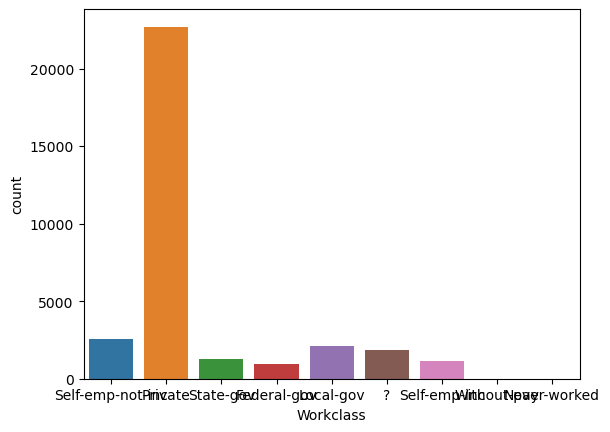

In [57]:
sns.countplot(df['Workclass'])

In [58]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

<AxesSubplot:xlabel='Education', ylabel='count'>

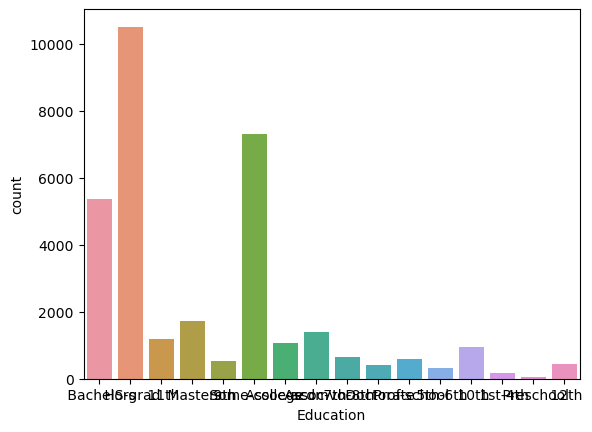

In [59]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

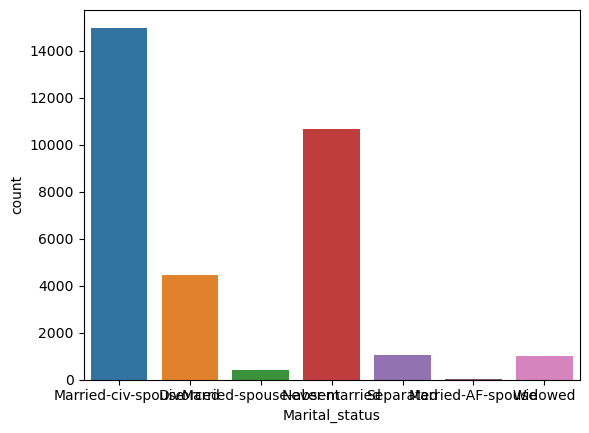

In [60]:
sns.countplot(df['Marital_status'])

In [62]:
df['Marital_status'].unique()

array(['Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'],
      dtype=object)

In [63]:
df['Occupation'].unique()

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

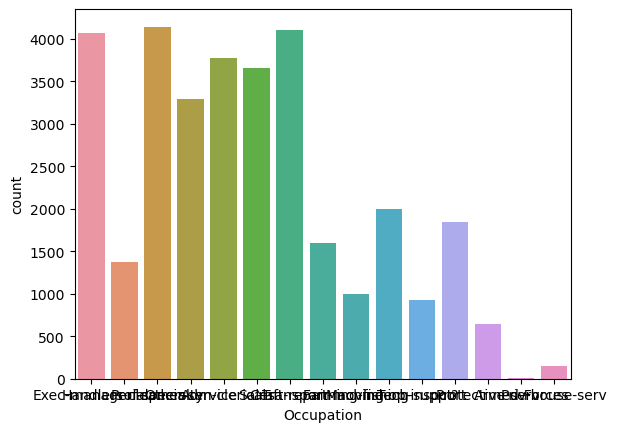

In [64]:
sns.countplot(df['Occupation'])

<AxesSubplot:xlabel='Relationship', ylabel='count'>

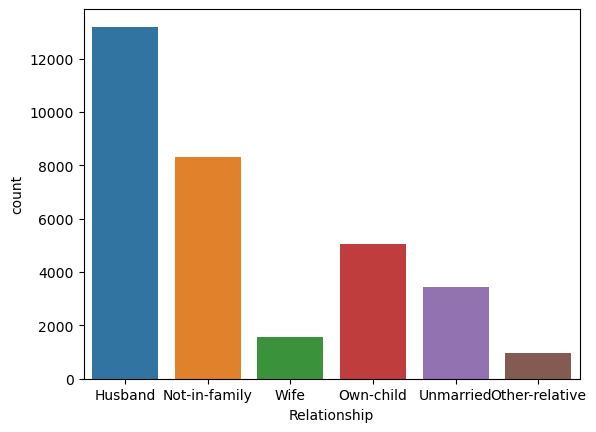

In [65]:
sns.countplot(df['Relationship'])

In [66]:
df['Relationship'].unique()

array(['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [67]:
df['Race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

<AxesSubplot:xlabel='Race', ylabel='count'>

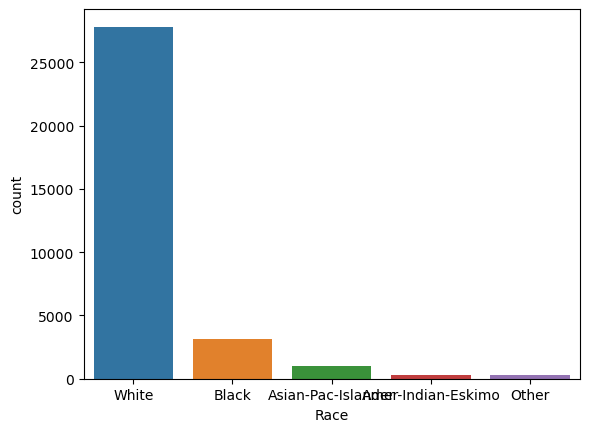

In [68]:
sns.countplot(df['Race'])

In [69]:
df.Sex.value_counts()

Male      21789
Female    10771
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Native_country', ylabel='count'>

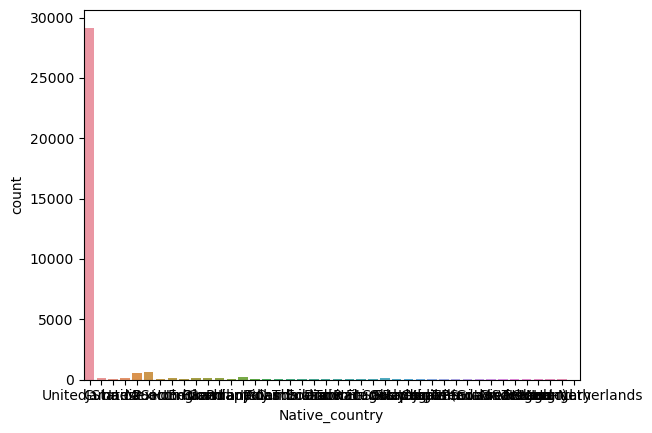

In [70]:
sns.countplot(df['Native_country'])

In [71]:
df['Native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

<AxesSubplot:xlabel='Income', ylabel='count'>

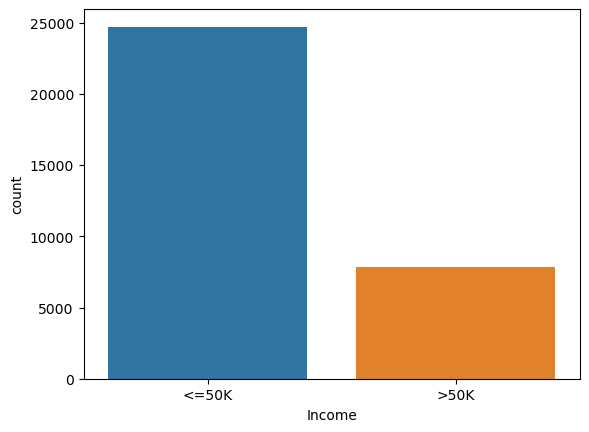

In [72]:
sns.countplot(df['Income'])

In [73]:
df['Income'].value_counts()

<=50K    24719
>50K      7841
Name: Income, dtype: int64

In [74]:
df.duplicated().sum()

24

In [75]:
df = df[~df.duplicated()]

In [76]:
df.duplicated().sum()

0

In [77]:
# removing spaces from entries
columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for column in columns:
    df[column] = df[column].str.strip()


In [78]:
# changing "?" to Unknown
change_columns = ['Workclass', 'Occupation', 'Native_country']
for column in change_columns:
        df[column] = df[column].replace({'?': 'Unknown'})

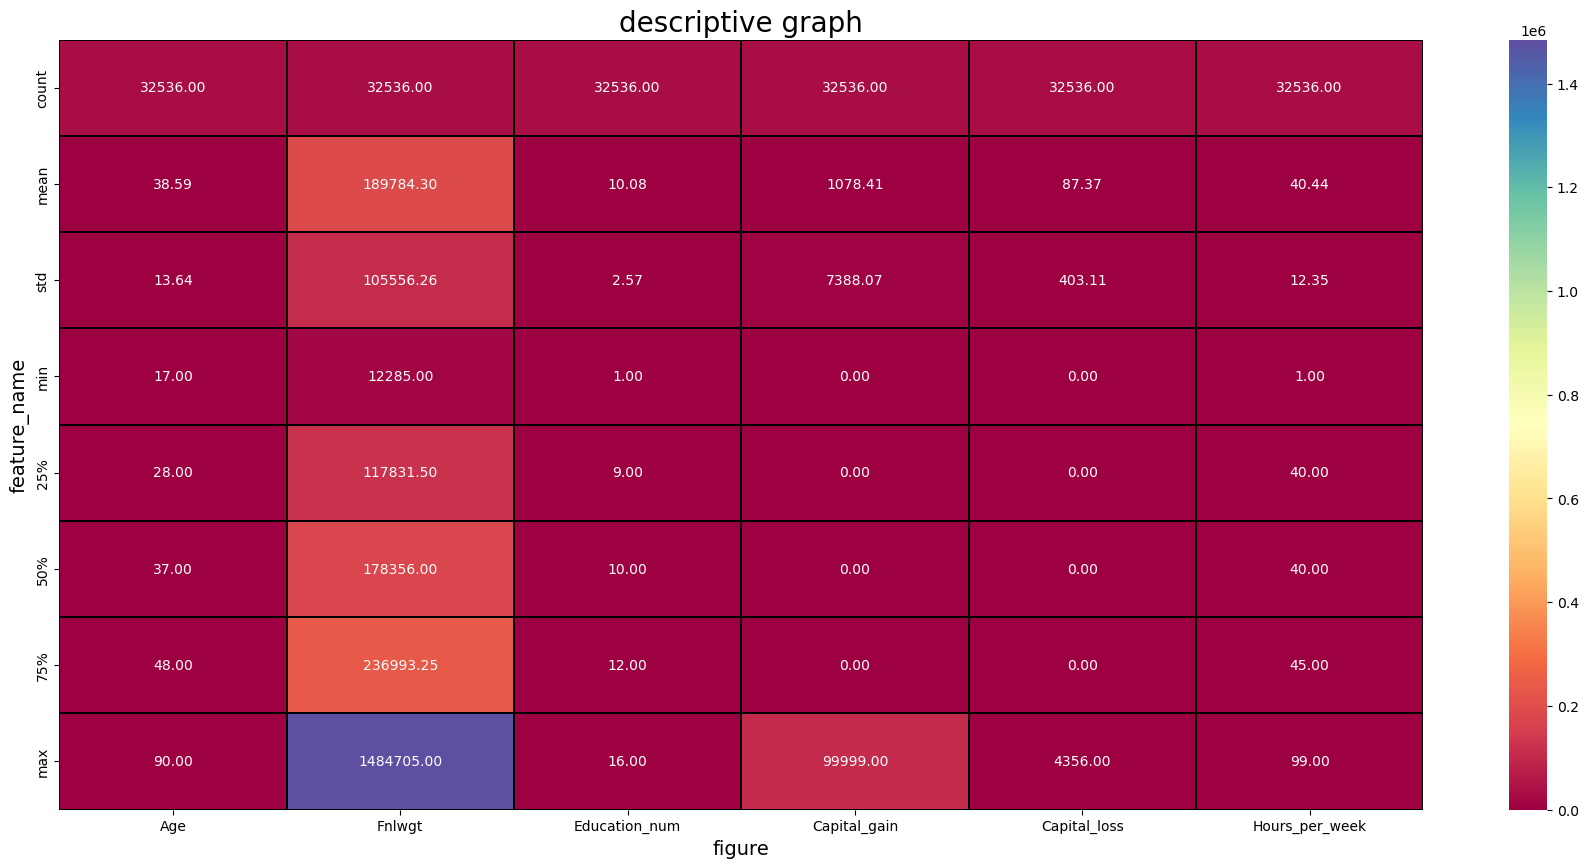

In [79]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_name',fontsize=14)
plt.title('descriptive graph',fontsize=20)
plt.show()

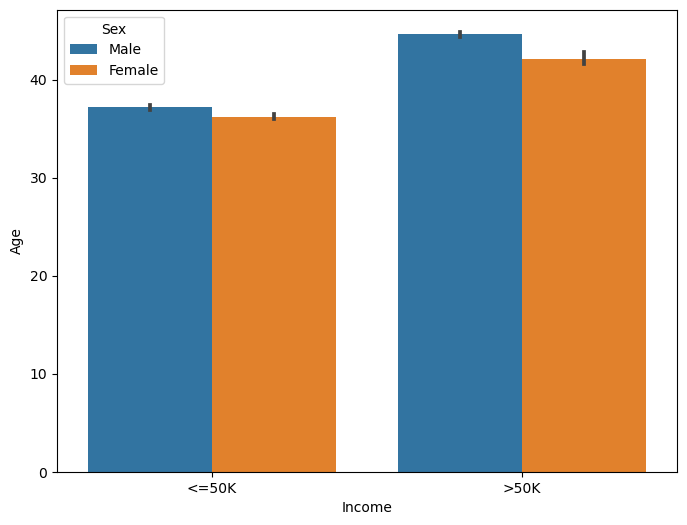

In [80]:
plt.figure(figsize=[8,6])
ax = sns.barplot(data = df, x = 'Income', y = 'Age', hue = 'Sex')

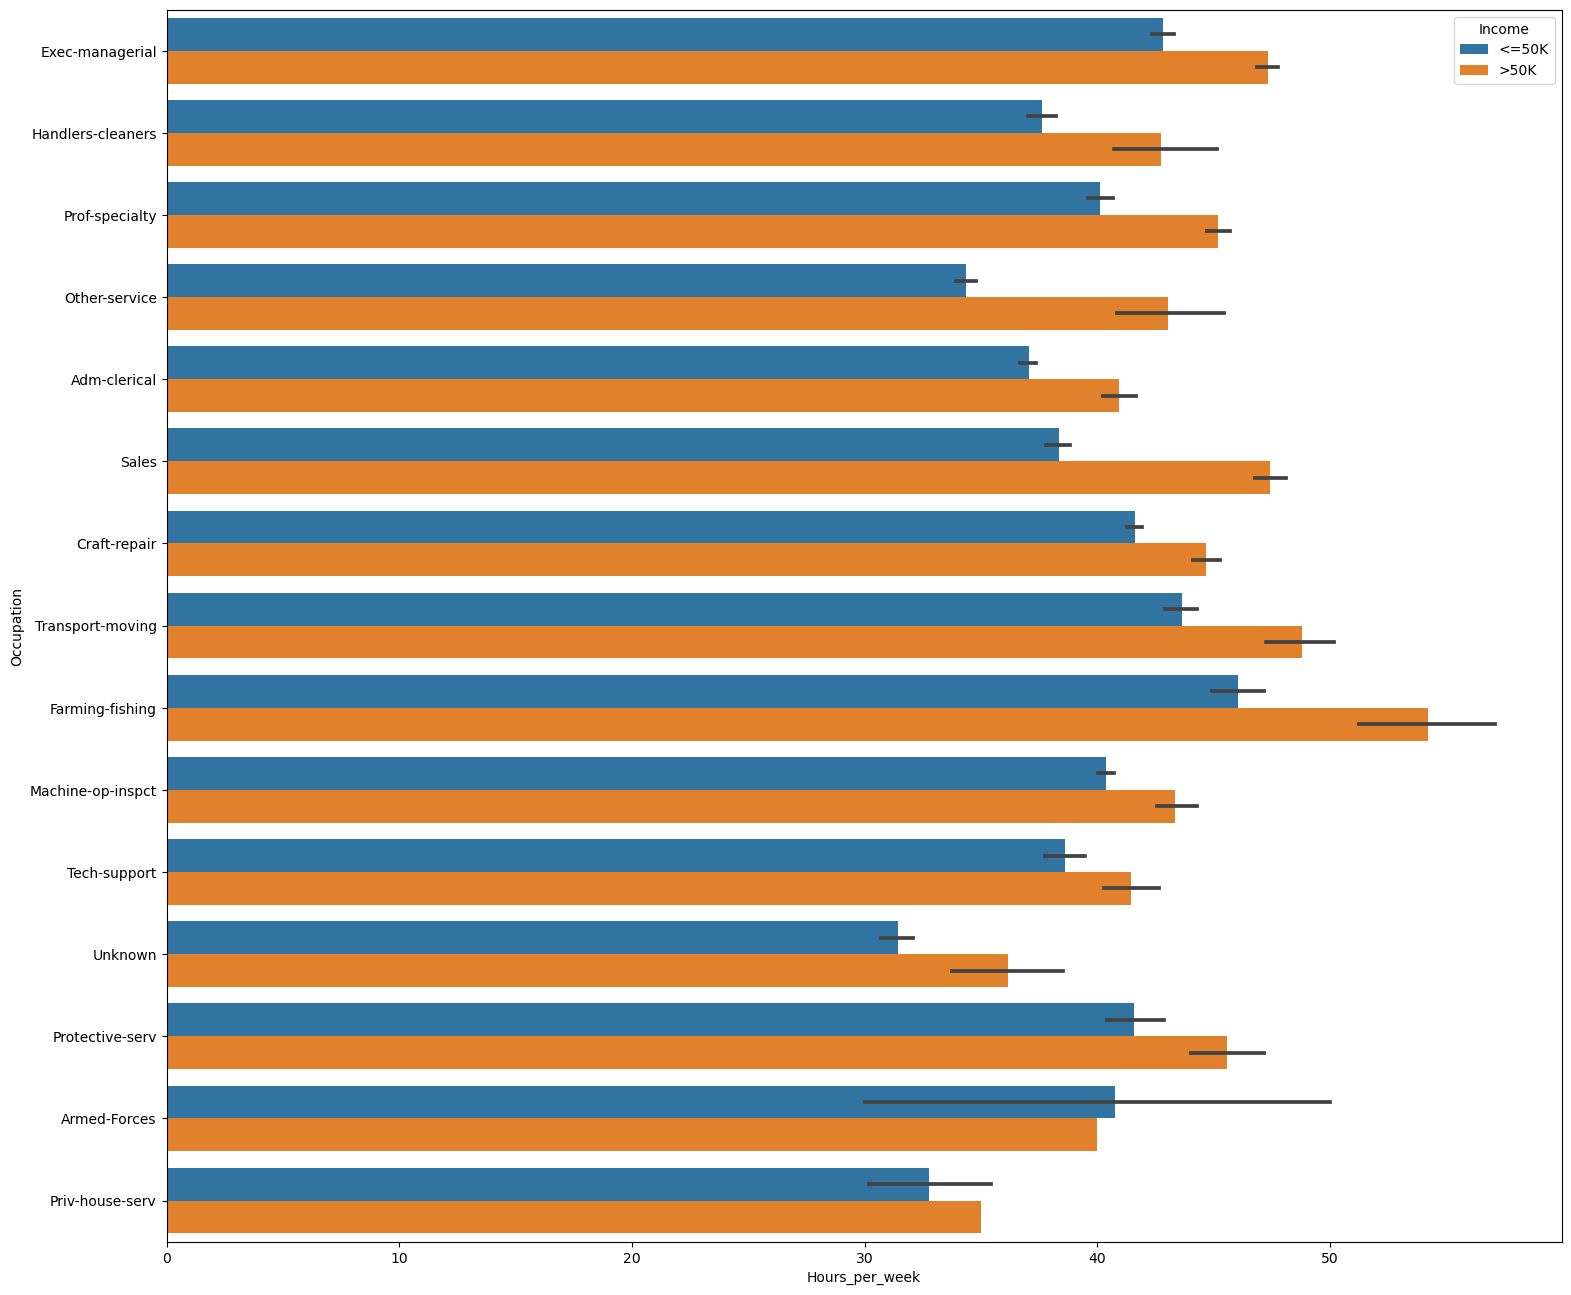

In [81]:
plt.figure(figsize=[18,16])
ax = sns.barplot(data = df, x = 'Hours_per_week', y = 'Occupation', hue = 'Income')

In [82]:
# Scalling
from sklearn.preprocessing import StandardScaler
numerical = ['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Fnlwgt']

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

In [83]:
df[numerical].head()

,Age,Capital_gain,Capital_loss,Hours_per_week,Fnlwgt
0,0.836961,-0.145969,-0.216747,-2.222450,-1.008703
1,-0.042934,-0.145969,-0.216747,-0.035664,0.245008
2,1.056935,-0.145969,-0.216747,-0.035664,0.425720
3,-0.776180,-0.145969,-0.216747,-0.035664,1.408036
4,-0.116259,-0.145969,-0.216747,-0.035664,0.898091


In [84]:
#ENCODING

df['Sex']=df['Sex'].replace({"Female": 0, "Male": 1})
df['Income']=df['Income'].replace({"<=50K": 0, ">50K": 1})


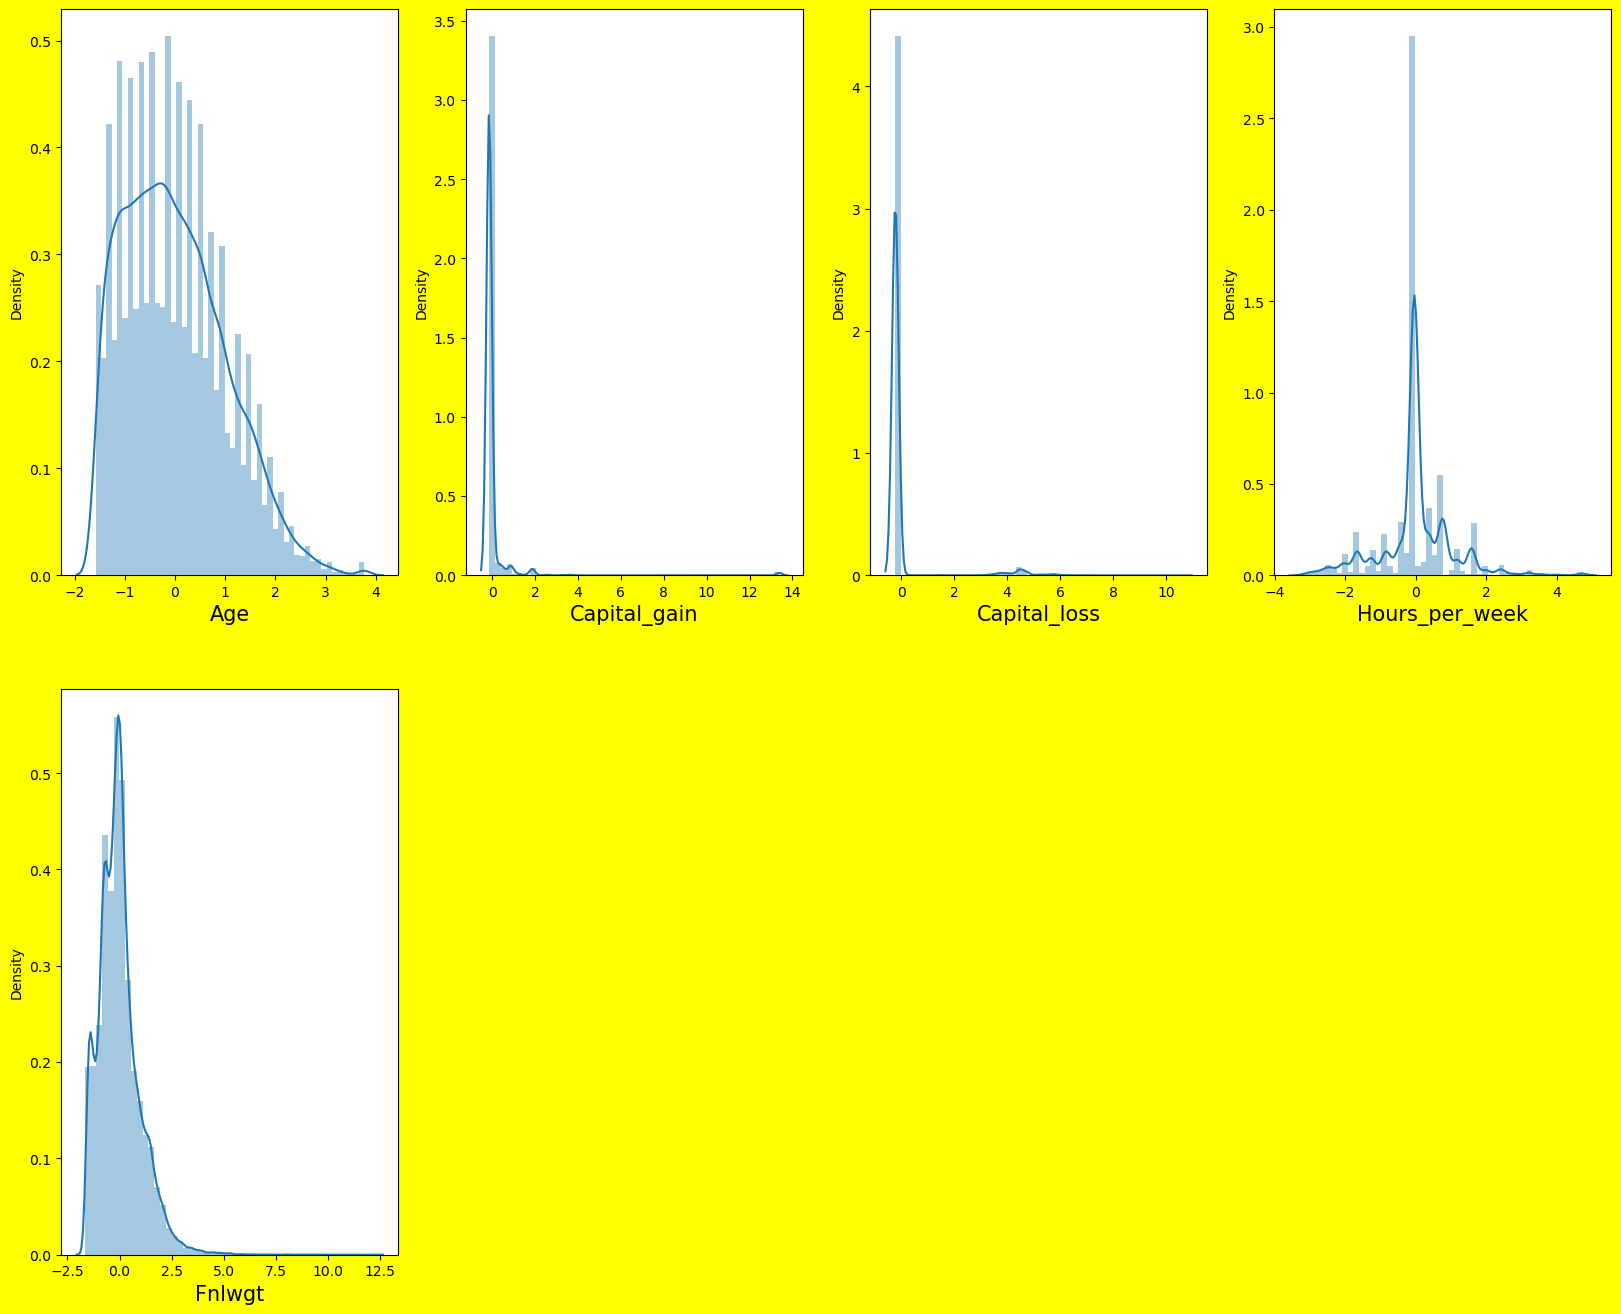

In [85]:
plt.figure(figsize=(20,25),facecolor='yellow')
graph=1
numerical=['Age','Capital_gain','Capital_loss','Hours_per_week','Fnlwgt']
for column in numerical:
    if graph<=18:
        plt.subplot(3,4,graph)
        ax=sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()  

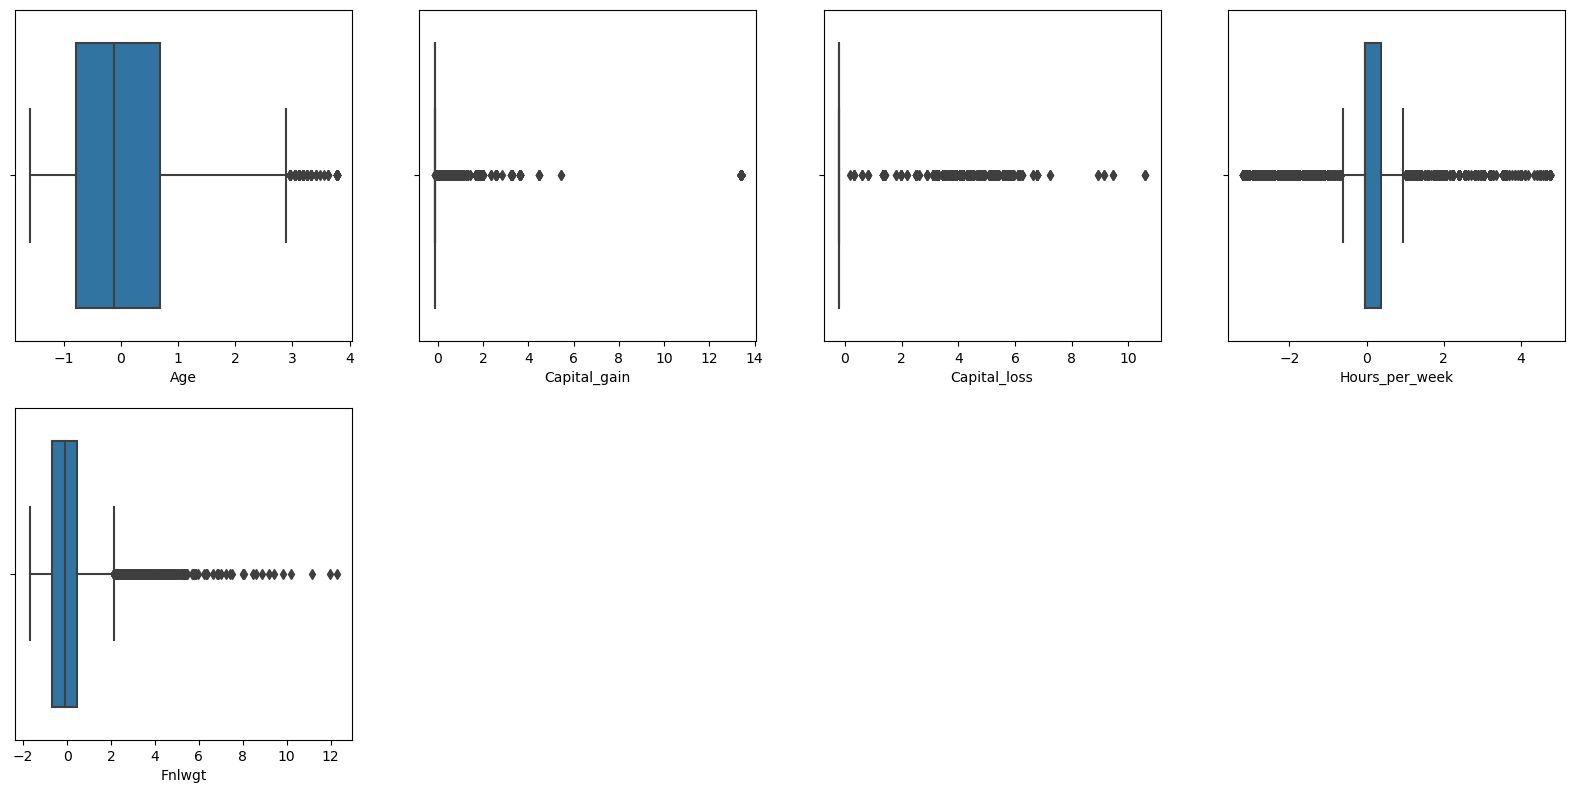

In [86]:
plt.figure(figsize=(20,25))
p=1
for i in numerical:
    if p<13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
       
    p+=1
    
plt.show()

In [87]:
# all the above column have some outliers
from scipy.stats import zscore
out_features=df[['Age','Capital_gain','Capital_loss','Hours_per_week']]
z=np.abs(zscore(out_features))
z

,Age,Capital_gain,Capital_loss,Hours_per_week
0,0.836961,0.145969,0.216747,2.222450
1,0.042934,0.145969,0.216747,0.035664
2,1.056935,0.145969,0.216747,0.035664
3,0.776180,0.145969,0.216747,0.035664
4,0.116259,0.145969,0.216747,0.035664
...,...,...,...,...
32555,0.849505,0.145969,0.216747,0.197648
32556,0.103715,0.145969,0.216747,0.035664
32557,1.423558,0.145969,0.216747,0.035664
32558,1.216128,0.145969,0.216747,1.655506


In [88]:
#threshold=3
np.where(z>3)

(array([    9,    22,    27, ..., 32500, 32500, 32506]),
 array([3, 2, 3, ..., 0, 3, 3]))

In [89]:
df1=df[(z<3).all(axis=1)]


df1.shape

(30333, 15)

In [90]:
print('old data shape',df.shape[0])
print("new data shape",df1.shape[0])

old data shape 32536
new data shape 30333


In [91]:
df.skew()

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Income             1.211640
dtype: float64

In [92]:
df1.skew()

Age                0.491871
Fnlwgt             1.473542
Education_num     -0.324750
Sex               -0.682889
Capital_gain       4.953369
Capital_loss      29.912594
Hours_per_week    -0.350470
Income             1.338821
dtype: float64

In [93]:
df1['Capital_loss'].isna().sum()

0

In [94]:
df1.skew()

Age                0.491871
Fnlwgt             1.473542
Education_num     -0.324750
Sex               -0.682889
Capital_gain       4.953369
Capital_loss      29.912594
Hours_per_week    -0.350470
Income             1.338821
dtype: float64

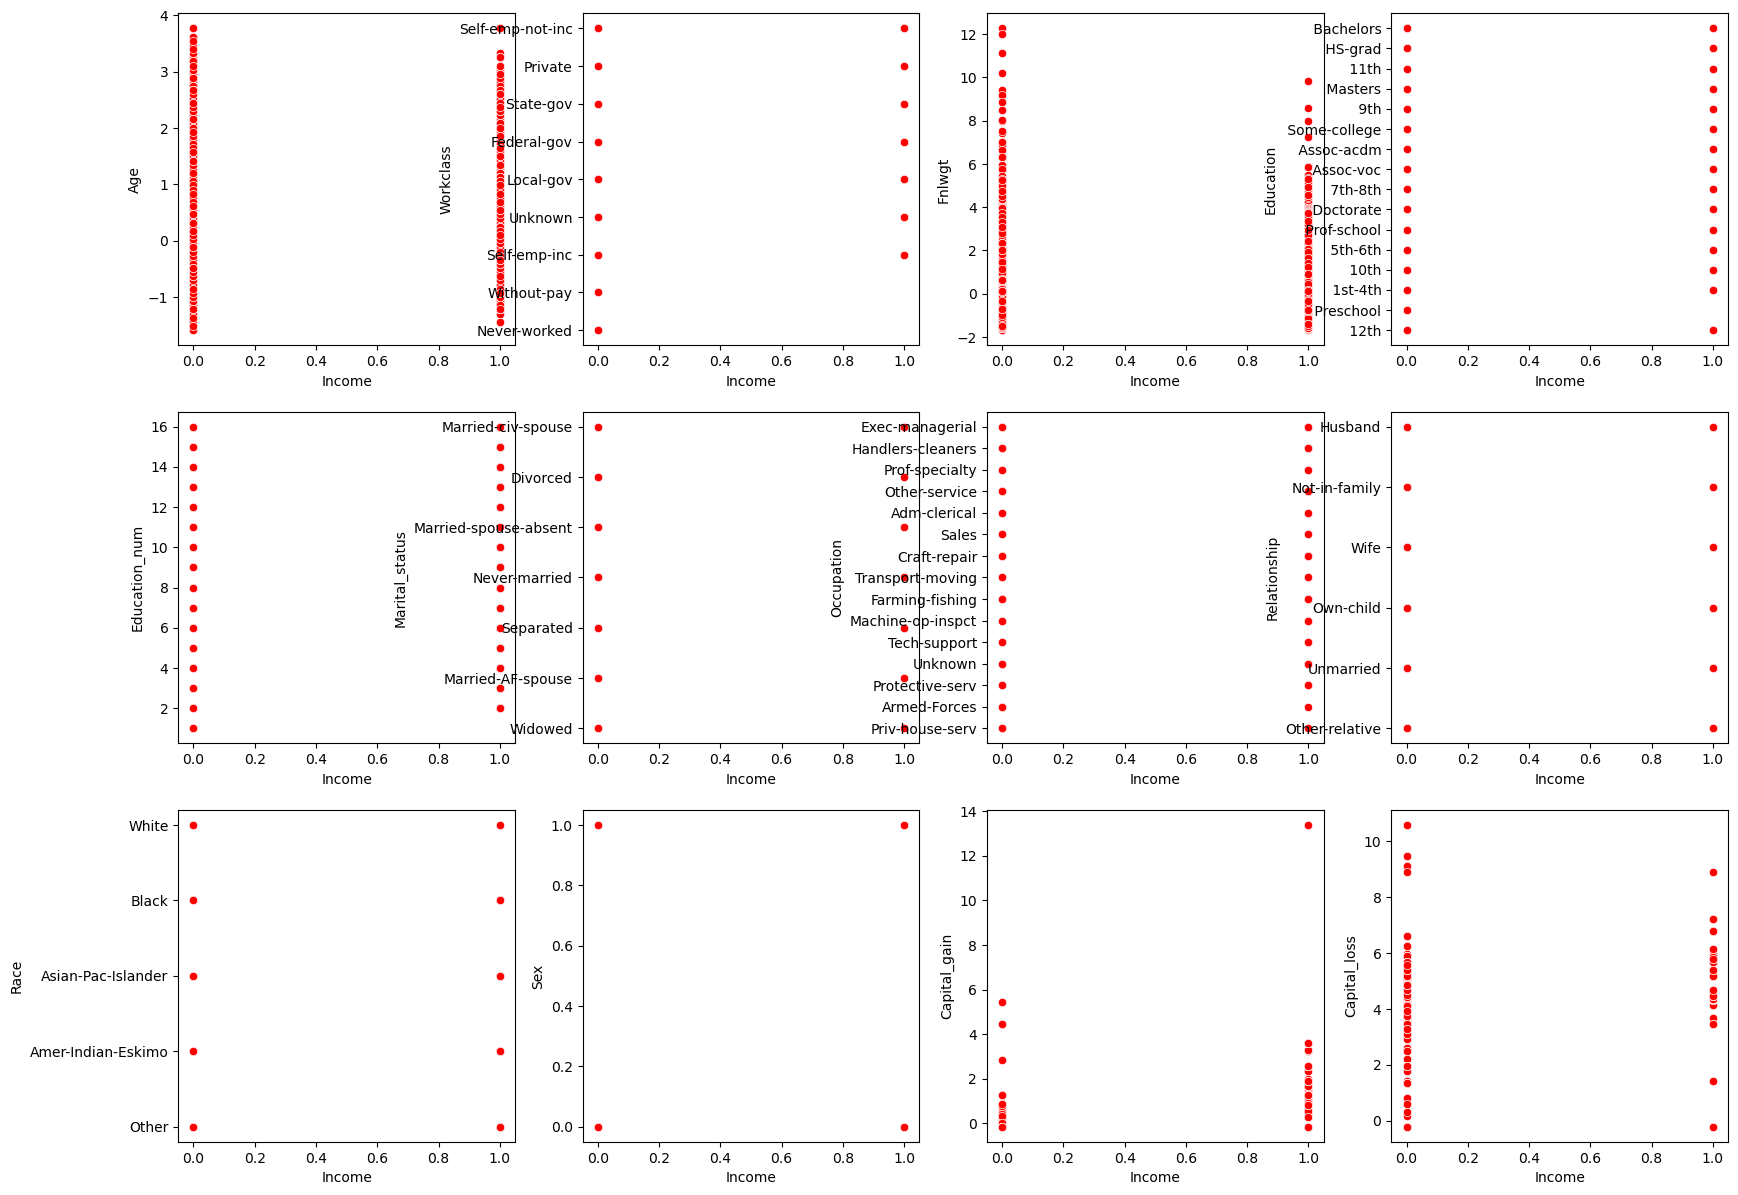

In [95]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<13:
        plt.subplot(5,4,p)
        sns.scatterplot(x="Income",y=i,data=df,color='r')
        plt.xlabel('Income')
        plt.ylabel(i)
    p+=1
    
plt.show()

In [96]:
one_hot = pd.get_dummies(df1['Workclass'])
df1 = df1.drop('Workclass',axis = 1)
df1 = df1.join(one_hot)

df1.head()


,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,...,Income,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Unknown,Without-pay
0,0.836961,-1.008703,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,-0.145969,...,0,0,0,0,0,0,1,0,0,0
1,-0.042934,0.245008,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,-0.145969,...,0,0,0,0,1,0,0,0,0,0
2,1.056935,0.425720,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,-0.145969,...,0,0,0,0,1,0,0,0,0,0
3,-0.776180,1.408036,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,-0.145969,...,0,0,0,0,1,0,0,0,0,0
4,-0.116259,0.898091,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,-0.145969,...,0,0,0,0,1,0,0,0,0,0


In [97]:
one_hot = pd.get_dummies(df1['Marital_status'])
df1 = df1.drop('Marital_status',axis = 1)
df1 = df1.join(one_hot)

df1.head()

,Age,Fnlwgt,Education,Education_num,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,...,State-gov,Unknown,Without-pay,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0.836961,-1.008703,Bachelors,13,Exec-managerial,Husband,White,1,-0.145969,-0.216747,...,0,0,0,0,0,1,0,0,0,0
1,-0.042934,0.245008,HS-grad,9,Handlers-cleaners,Not-in-family,White,1,-0.145969,-0.216747,...,0,0,0,1,0,0,0,0,0,0
2,1.056935,0.425720,11th,7,Handlers-cleaners,Husband,Black,1,-0.145969,-0.216747,...,0,0,0,0,0,1,0,0,0,0
3,-0.776180,1.408036,Bachelors,13,Prof-specialty,Wife,Black,0,-0.145969,-0.216747,...,0,0,0,0,0,1,0,0,0,0
4,-0.116259,0.898091,Masters,14,Exec-managerial,Wife,White,0,-0.145969,-0.216747,...,0,0,0,0,0,1,0,0,0,0


In [98]:
one_hot = pd.get_dummies(df1['Race'])
df1 = df1.drop('Race',axis = 1)
df1 = df1.join(one_hot)

df1.head()

,Age,Fnlwgt,Education,Education_num,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,...,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.836961,-1.008703,Bachelors,13,Exec-managerial,Husband,1,-0.145969,-0.216747,-2.222450,...,1,0,0,0,0,0,0,0,0,1
1,-0.042934,0.245008,HS-grad,9,Handlers-cleaners,Not-in-family,1,-0.145969,-0.216747,-0.035664,...,0,0,0,0,0,0,0,0,0,1
2,1.056935,0.425720,11th,7,Handlers-cleaners,Husband,1,-0.145969,-0.216747,-0.035664,...,1,0,0,0,0,0,0,1,0,0
3,-0.776180,1.408036,Bachelors,13,Prof-specialty,Wife,0,-0.145969,-0.216747,-0.035664,...,1,0,0,0,0,0,0,1,0,0
4,-0.116259,0.898091,Masters,14,Exec-managerial,Wife,0,-0.145969,-0.216747,-0.035664,...,1,0,0,0,0,0,0,0,0,1


In [99]:
one_hot = pd.get_dummies(df1['Relationship'])
df1 = df1.drop('Relationship',axis = 1)
df1 = df1.join(one_hot)

df1.head()

,Age,Fnlwgt,Education,Education_num,Occupation,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,...,Asian-Pac-Islander,Black,Other,White,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0.836961,-1.008703,Bachelors,13,Exec-managerial,1,-0.145969,-0.216747,-2.222450,United-States,...,0,0,0,1,1,0,0,0,0,0
1,-0.042934,0.245008,HS-grad,9,Handlers-cleaners,1,-0.145969,-0.216747,-0.035664,United-States,...,0,0,0,1,0,1,0,0,0,0
2,1.056935,0.425720,11th,7,Handlers-cleaners,1,-0.145969,-0.216747,-0.035664,United-States,...,0,1,0,0,1,0,0,0,0,0
3,-0.776180,1.408036,Bachelors,13,Prof-specialty,0,-0.145969,-0.216747,-0.035664,Cuba,...,0,1,0,0,0,0,0,0,0,1
4,-0.116259,0.898091,Masters,14,Exec-managerial,0,-0.145969,-0.216747,-0.035664,United-States,...,0,0,0,1,0,0,0,0,0,1


In [100]:
df1['Native_country']=df1['Native_country'].replace({"United-States": 0, "Cuba": 1,"Jamaica":2,"India":3,"Unknown":4,"Mexico":5,"South":6,"Puerto-Rico":7,"Honduras":8,"England":9,"Canada":10,"Germany":11,"Cambodia":12,"Thailand":13,"Ecuador":14,"Laos":15,"Taiwan":16,"Haiti":17,"Portugal":18,"Dominican-Republic":19,"El-Salvador":20,"France":21,"Guatemala":22,"China":23,"Japan":24,"Yugoslavia":25,"Peru":26,"Outlying-US(Guam-USVI-etc)":27,"Scotland":28,"Trinadad&Tobago":29,"Greece":30,"Nicaragua":31,"Vietnam":32,"Hong":33,"Ireland":34,"Hungary":35,"Holand-Netherlands":36,"Iran":37,"Philippines":38,"Italy":39,"Poland":40,"Columbia":41})
df1['Occupation']=df1['Occupation'].replace({"Exec-managerial": 0, "Handlers-cleaners": 1,'Prof-specialty':2,"Other-service":3,"Adm-clerical":4,"Sales":5,"Craft-repair":6,"Transport-moving":7,"Farming-fishing":8,"Machine-op-inspct":9,"Tech-support":10,"Unknown":11,"Protective-serv":12,"Armed-Forces":13,"Priv-house-serv":14})


In [101]:
df1.dtypes

Age                      float64
Fnlwgt                   float64
Education                 object
Education_num              int64
Occupation                 int64
Sex                        int64
Capital_gain             float64
Capital_loss             float64
Hours_per_week           float64
Native_country             int64
Income                     int64
Federal-gov                uint8
Local-gov                  uint8
Never-worked               uint8
Private                    uint8
Self-emp-inc               uint8
Self-emp-not-inc           uint8
State-gov                  uint8
Unknown                    uint8
Without-pay                uint8
Divorced                   uint8
Married-AF-spouse          uint8
Married-civ-spouse         uint8
Married-spouse-absent      uint8
Never-married              uint8
Separated                  uint8
Widowed                    uint8
Amer-Indian-Eskimo         uint8
Asian-Pac-Islander         uint8
Black                      uint8
Other     

In [102]:
df1['Occupation']=df1['Occupation'].astype(float)


In [103]:
df1['Native_country']=df1['Native_country'].astype(int)

In [104]:
x=df1.drop(columns=["Income","Education"],axis=1)
y=df1['Income']

In [105]:
x.isna().sum()

Age                      0
Fnlwgt                   0
Education_num            0
Occupation               0
Sex                      0
Capital_gain             0
Capital_loss             0
Hours_per_week           0
Native_country           0
Federal-gov              0
Local-gov                0
Never-worked             0
Private                  0
Self-emp-inc             0
Self-emp-not-inc         0
State-gov                0
Unknown                  0
Without-pay              0
Divorced                 0
Married-AF-spouse        0
Married-civ-spouse       0
Married-spouse-absent    0
Never-married            0
Separated                0
Widowed                  0
Amer-Indian-Eskimo       0
Asian-Pac-Islander       0
Black                    0
Other                    0
White                    0
Husband                  0
Not-in-family            0
Other-relative           0
Own-child                0
Unmarried                0
Wife                     0
dtype: int64

In [106]:
#feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Fnlwgt,Education_num,Occupation,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Federal-gov,...,Asian-Pac-Islander,Black,Other,White,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0.885896,-1.009547,1.174385,-1.435300,0.715253,-0.244025,-0.036662,-2.415054,-0.250582,-0.174565,...,-0.180103,-0.330254,-0.09262,0.416986,1.240122,-0.586982,-0.179125,-0.438453,-0.351347,-0.223328
1,-0.011931,0.239428,-0.401663,-1.133588,0.715253,-0.244025,-0.036662,0.010639,-0.250582,-0.174565,...,-0.180103,-0.330254,-0.09262,0.416986,-0.806373,1.703630,-0.179125,-0.438453,-0.351347,-0.223328
2,1.110353,0.419458,-1.189686,-1.133588,0.715253,-0.244025,-0.036662,0.010639,-0.250582,-0.174565,...,-0.180103,3.027973,-0.09262,-2.398159,1.240122,-0.586982,-0.179125,-0.438453,-0.351347,-0.223328
3,-0.760120,1.398063,1.174385,-0.831877,-1.398108,-0.244025,-0.036662,0.010639,-0.083110,-0.174565,...,-0.180103,3.027973,-0.09262,-2.398159,-0.806373,-0.586982,-0.179125,-0.438453,-0.351347,4.477719
4,-0.086750,0.890045,1.568396,-1.435300,-1.398108,-0.244025,-0.036662,0.010639,-0.250582,-0.174565,...,-0.180103,-0.330254,-0.09262,0.416986,-0.806373,-0.586982,-0.179125,-0.438453,-0.351347,4.477719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30328,-0.834939,0.632577,0.780373,1.581814,-1.398108,-0.244025,-0.036662,-0.169042,-0.250582,-0.174565,...,-0.180103,-0.330254,-0.09262,0.416986,-0.806373,-0.586982,-0.179125,-0.438453,-0.351347,4.477719
30329,0.137707,-0.338856,-0.401663,1.280102,0.715253,-0.244025,-0.036662,0.010639,-0.250582,-0.174565,...,-0.180103,-0.330254,-0.09262,0.416986,1.240122,-0.586982,-0.179125,-0.438453,-0.351347,-0.223328
30330,1.484447,-0.362111,-0.401663,-0.228454,-1.398108,-0.244025,-0.036662,0.010639,-0.250582,-0.174565,...,-0.180103,-0.330254,-0.09262,0.416986,-0.806373,-0.586982,-0.179125,-0.438453,2.846192,-0.223328
30331,-1.209033,0.105824,-0.401663,-0.228454,0.715253,-0.244025,-0.036662,-1.786170,-0.250582,-0.174565,...,-0.180103,-0.330254,-0.09262,0.416986,-0.806373,-0.586982,-0.179125,2.280745,-0.351347,-0.223328


<AxesSubplot:xlabel='Income', ylabel='count'>

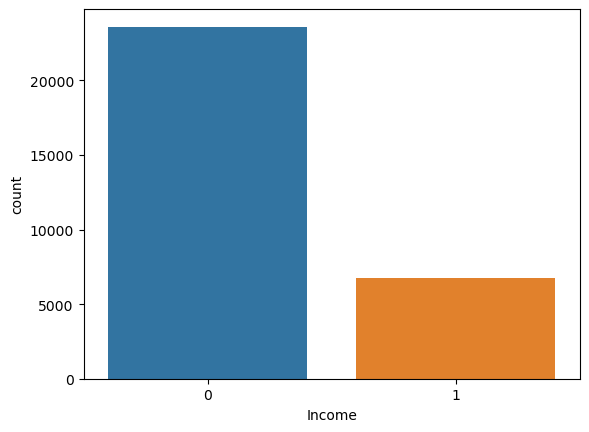

In [107]:
sns.countplot(df1['Income'])

In [108]:
#data is imbalanced

from imblearn.over_sampling import SMOTE

x_res,y_res=SMOTE().fit_resample(x,y)

y_res.value_counts()

0    23603
1    23603
Name: Income, dtype: int64

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.20,random_state=42)

In [110]:
print(y.shape,y_train.shape,y_test.shape)

(30333,) (37764,) (9442,)


In [111]:
print(x.shape,x_train.shape,x_test.shape)

(30333, 36) (37764, 36) (9442, 36)


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print(accuracy_score(y_test,pred))


0.8212243168820165


In [113]:
print(confusion_matrix(y_test,pred))

[[3730 1002]
 [ 686 4024]]


In [114]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      4732
           1       0.80      0.85      0.83      4710

    accuracy                           0.82      9442
   macro avg       0.82      0.82      0.82      9442
weighted avg       0.82      0.82      0.82      9442



In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
dtc=DecisionTreeClassifier()
sv=SVC()
knn=KNeighborsClassifier()
mnb=MultinomialNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()




model=[dtc,sv,knn,mnb,RFC,GBC]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    
    print('\n')

accuracy score of DecisionTreeClassifier() is:
0.8623173056555814
[[4055  677]
 [ 623 4087]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4732
           1       0.86      0.87      0.86      4710

    accuracy                           0.86      9442
   macro avg       0.86      0.86      0.86      9442
weighted avg       0.86      0.86      0.86      9442





In [ ]:
#our best model is  GRADIENTBOOSTINGCLASSIFIER

In [ ]:
import joblib

#from sklearn.externals import joblib
#save the model as a object file

joblib.dump(dtc,'DTCfile.obj')
#load the model from file

MODEL=joblib.load('DTCfile.obj')

#use the loaded model to make predictions

MODEL.predict(x_test)

In [119]:
conclusion=pd.DataFrame([MODEL.predict(x_test)[:],y_test[:]],index=['predicted','original'])
conclusion

ValueError: X has 36 features, but RandomForestClassifier is expecting 58 features as input.

In [120]:
result=MODEL.score(x_test,y_test)
print(result*100)

ValueError: X has 36 features, but RandomForestClassifier is expecting 58 features as input.